In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

In [4]:
df_raw = pd.read_csv('Train.csv', low_memory=False, 
                     parse_dates=["Opening Day of Restaurant"])

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [200]:
#df_raw[['Annual Turnover']] = np.log(df_raw[['Annual Turnover']])

In [6]:
add_datepart(df_raw, 'Opening Day of Restaurant')


,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Opening Day of RestaurantDay,Opening Day of RestaurantDayofweek,Opening Day of RestaurantDayofyear,Opening Day of RestaurantIs_month_end,Opening Day of RestaurantIs_month_start,Opening Day of RestaurantIs_quarter_end,Opening Day of RestaurantIs_quarter_start,Opening Day of RestaurantIs_year_end,Opening Day of RestaurantIs_year_start,Opening Day of RestaurantElapsed
0,20001,42000000,"indian,irish",Bangalore,Near Business Hub,84.3,Not Specific,95.8,1,1,...,14,5,45,False,False,False,False,False,False,1234569600
1,20002,50000000,"indian,irish",Indore,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,...,29,0,273,False,False,False,False,False,False,1222646400
2,20003,32500000,"tibetan,italian",Chennai,Near Business Hub,85.0,Tier A Celebrity,68.2,1,1,...,30,5,211,False,False,False,False,False,False,1311984000
3,20004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,85.6,Tier A Celebrity,83.6,0,1,...,30,6,335,True,False,False,False,False,False,1228003200
4,20005,20000000,"irish,belgian",Manesar,Near Party Hub,NaN,Tier A Celebrity,76.8,1,1,...,22,0,53,False,False,False,False,False,False,1266796800


In [7]:
train_cats(df_raw)


In [8]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))


Ambience                                     0.007157
Annual Turnover                              0.000000
City                                         0.000000
Comedy Gigs Rating                           0.710850
Comfortablility                              0.000000
Cuisine                                      0.000000
Dedicated Parking                            0.000000
Endorsed By                                  0.000000
Facebook Popularity Quotient                 0.028342
Fire Audit                                   0.000000
Food Rating                                  0.000000
Hygiene Rating                               0.000000
Instagram Popularity Quotient                0.016032
Liquor License Obtained                      0.000000
Live Music Rating                            0.219009
Live Sports Rating                           0.941311
Lively                                       0.000000
Open Sitting Available                       0.000000
Opening Day of RestaurantDay

In [9]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/hackathon-raw')

In [10]:
df, y, nas = proc_df(df_raw, 'Annual Turnover')

In [11]:
df_keep=['Opening Day of RestaurantElapsed', 'Hygiene Rating',
       'Instagram Popularity Quotient', 'Facebook Popularity Quotient',
       'Live Music Rating', 'City', 'Cuisine', 'Ambience',
       'Opening Day of RestaurantDay', 'Resturant Tier',
       'Opening Day of RestaurantWeek', 'Privacy', 'Order Wait Time',
       'Opening Day of RestaurantDayofweek', 'Lively', 'Food Rating',
       'Comfortablility', 'Service', 'Staff Responsivness', 'Value for Money',
       'Overall Restaurant Rating', 'Restaurant Theme',
       'Situated in a Multi Complex', 'Restaurant Type',
       'Restaurant Zomato Rating', 'Restaurant City Tier',
       'Value Deals Rating_na', 'Fire Audit', 'Restaurant Location',
       'Endorsed By', 'Dedicated Parking', 'Comedy Gigs Rating_na',
       'Live Sports Rating_na']
test_keep=['Opening Day of RestaurantElapsed', 'Hygiene Rating',
       'Instagram Popularity Quotient', 'Facebook Popularity Quotient',
       'Live Music Rating', 'City', 'Cuisine', 'Ambience',
       'Opening Day of RestaurantDay', 'Resturant Tier',
       'Opening Day of RestaurantWeek', 'Privacy', 'Order Wait Time',
       'Opening Day of RestaurantDayofweek', 'Lively', 'Food Rating',
       'Comfortablility', 'Service', 'Staff Responsivness', 'Value for Money',
       'Overall Restaurant Rating', 'Restaurant Theme',
       'Situated in a Multi Complex', 'Restaurant Type',
       'Restaurant Zomato Rating', 'Restaurant City Tier',
       'Value Deals Rating_na', 'Fire Audit', 'Restaurant Location',
       'Endoresed By', 'Dedicated Parking', 'Comedy Gigs Rating_na',
       'Live Sports Rating_na']

In [12]:
df.drop(columns=['Facebook Popularity Quotient_na','Instagram Popularity Quotient_na','Resturant Tier_na','Ambience_na'],inplace=True)

In [13]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8055435241757858

In [14]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 700  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((2793, 50), (2793,), (700, 50))

In [15]:

def rmse(x,y): return ((np.log(x+1)-np.log(y+1))**2).mean()

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [16]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 428 ms, sys: 4 ms, total: 432 ms
Wall time: 219 ms
[0.06955042552857343, 0.3028534476720411, 0.7988757246774544, -0.0952455059062145]


In [19]:
df_trn, y_trn, nas = proc_df(df_raw, 'Annual Turnover', subset=2800, na_dict=nas)
df_trn.drop(columns=['Facebook Popularity Quotient_na','Instagram Popularity Quotient_na','Resturant Tier_na','Ambience_na'],inplace=True)
X_train, _ = split_vals(df_trn, 700)
y_train, _ = split_vals(y_trn, 700)

In [20]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 88 ms, sys: 8 ms, total: 96 ms
Wall time: 111 ms
[0.06147125515462325, 0.3884387822699222, 0.8163520190070912, -0.7550589407758532]


In [21]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.23934587472789404, 0.3843408891400585, 0.3980199300706655, -5.003601636089031]


In [216]:
draw_tree(m.estimators_[0], df_trn, precision=3)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [22]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.5515536744542497, 1.0, -5.612260315595267]


In [23]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06509580702286348, 0.35071571439719923, 0.8376410425378917, -0.723607062867245]


In [24]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]


(array([5.00e+07, 4.60e+07, 3.50e+08, 5.50e+07, 2.20e+07, 4.80e+07, 3.05e+07, 4.60e+07, 5.35e+07, 3.35e+07]),
 73450000.0,
 40000000)

In [25]:
preds.shape


(10, 700)

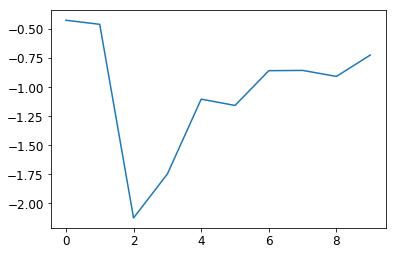

In [26]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);


In [27]:

m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.04808781475954292, 0.3302582067815842, 0.8575121283980346, -0.13645236496643687]


In [28]:
m = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.049376968232587595, 0.3461487616688176, 0.8723601231095578, -0.2769888130581477, -0.01900145391176089]


In [29]:
set_rf_samples(2000)


In [30]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 144 ms, sys: 4 ms, total: 148 ms
Wall time: 114 ms
[0.011981985777660402, 0.3189955259129104, 0.9729655914646327, -0.13074207174019326, -2.1307580239965196]


In [31]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.0022577638740727377, 0.32529853746831966, 0.9932782204150107, -0.10651865441167319, -0.6552352320619044]


In [32]:
reset_rf_samples()


In [33]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [34]:
m = RandomForestRegressor(n_estimators=140, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


[0.049161738175590296, 0.33379234655853535, 0.8738494119545964, -0.1054739685235686, -0.0033276878111725416]


In [35]:
t=m.estimators_[0].tree_

In [36]:
dectree_max_depth(t)

19

In [37]:

m = RandomForestRegressor(n_estimators=200, min_samples_leaf=4, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09400099309559404, 0.29362147043981296, 0.5312359901661584, 0.07886840076046775, 0.07437301589489032]


In [38]:
t=m.estimators_[0].tree_

In [39]:
dectree_max_depth(t)


16

In [40]:
m = RandomForestRegressor(n_estimators=300, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


[0.07661596757041245, 0.3002192147950527, 0.5953567962586128, 0.023607205573692554, 0.08103232995912624]


In [41]:
m = RandomForestRegressor(n_estimators=2000, min_samples_leaf=4, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


[0.10830592174867054, 0.2853823072824902, 0.5000948679058821, 0.11063287515750764, 0.10096234740722976]


In [42]:
test_df = pd.read_csv('Test.csv',parse_dates=["Opening Day of Restaurant"])

In [43]:
test_df.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,50001,"cuban,british",-1,Near Business Hub,2011-10-15,88.30,Not Specific,83.50,1,1,...,9.0,6.0,NaN,NaN,NaN,6,7,5,4,7
1,50002,"welsh,thai",Noida,Near Party Hub,2011-02-13,74.28,Tier A Celebrity,78.16,1,1,...,8.0,4.0,NaN,3.0,NaN,8,7,7,4,7
2,50003,"welsh,thai",Bangalore,Near Party Hub,2010-11-26,78.30,Not Specific,70.67,1,1,...,9.0,5.0,NaN,4.0,NaN,7,8,9,3,9
3,50004,"tibetan,italian",Hyderabad,Near Party Hub,2009-03-30,88.00,Not Specific,97.20,1,1,...,9.0,6.0,NaN,NaN,NaN,5,9,6,2,8
4,50005,"tibetan,greek",Chennai,Near Party Hub,2008-07-07,88.33,Not Specific,94.50,1,1,...,8.0,4.0,3.0,NaN,NaN,5,4,5,7,6


In [44]:
add_datepart(test_df, 'Opening Day of Restaurant')

In [45]:
train_cats(test_df)

In [46]:
test_df[['Annual Turnover']]=raw_train[['Annual Turnover']]

In [47]:
test_d,y,nas=proc_df(test_df,'Annual Turnover')

In [48]:
def generate_output(model,filename,test_dff):
    output=model.predict(test_dff)
    op=pd.DataFrame(columns=['Registration Number', 'Annual Turnover'])
    op[['Registration Number']]=test_d[['Registration Number']]
    op[['Annual Turnover']]=output
    op.to_csv(filename)

In [50]:
m4 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
m4.fit(X_train, y_train)
print_score(m4)

[0.049033228715722514, 0.33478807457211784, 0.8628543034499675, -0.1682000667549084]


In [57]:
generate_output(m4,'submission400.csv',test_d)

In [111]:
m5 = RandomForestRegressor(n_estimators=1200, min_samples_leaf=5, max_features=0.3, n_jobs=-1, oob_score=True,min_samples_split=9)
m5.fit(X_train, y_train)
print_score(m5)

[0.13045484804524965, 0.19453309493622084, 0.4875139056648762, 0.32656356252211427, 0.12430638202642275]


In [55]:
generate_output(m5,'submission5.csv')

NameError: name 'm5' is not defined

In [244]:
generate_output(m,'submission100.csv')

In [ ]:
generate_output(m)

In [52]:
X_train_keep=X_train[df_keep]

In [53]:
test_d_keep=test_d[test_keep]

In [54]:
m8 = RandomForestRegressor(n_estimators=1200, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True,min_samples_split=9)
m8.fit(X_train_keep, y_train)
print_score(m8)

ValueError: Number of features of the model must match the input. Model n_features is 33 and input n_features is 50 

In [47]:
generate_output(m8,'submission8.csv')

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [59]:
X_valid_keep=X_valid[df_keep]

In [60]:
df, y, nas, mapper = proc_df(X_valid_keep, 'Annual Turnover', do_scale=True)

KeyError: 'Annual Turnover'

In [61]:

m = LinearRegression().fit(X_train_keep, y_train)
m.score(X_valid, y_valid)

ValueError: shapes (700,50) and (33,) not aligned: 50 (dim 1) != 33 (dim 0)

In [53]:

from operator import itemgetter

In [54]:
sorted(list(zip(X_valid.columns, m.coef_)), key=itemgetter(1))


[('Resturant Tier', -8590457.903680239),
 ('Live Sports Rating_na', -5216405.966712899),
 ('Opening Day of RestaurantMonth', -2907550.421674121),
 ('Situated in a Multi Complex', -2301983.540692571),
 ('Live Music Rating_na', -1337874.4230222348),
 ('Restaurant City Tier', -1196177.0676712398),
 ('Restaurant Type', -930481.5298869343),
 ('Ambience', -871934.8842351784),
 ('Overall Restaurant Rating_na', -850174.4037306253),
 ('Comfortablility', -835542.4854150987),
 ('Opening Day of RestaurantIs_year_end', -735189.2589689669),
 ('Endorsed By', -625638.9404324661),
 ('Privacy', -512626.0704516422),
 ('Overall Restaurant Rating', -452993.5447106766),
 ('Comedy Gigs Rating_na', -366175.7391874042),
 ('Opening Day of RestaurantIs_quarter_end', -346303.67605243775),
 ('Value Deals Rating', -234209.35893767377),
 ('Restaurant Theme', -188863.768657621),
 ('Order Wait Time', -126325.47626767028),
 ('Dedicated Parking', -78929.10153663435),
 ('Opening Day of RestaurantDay', -76368.34398519341)

In [113]:
len(X_train_keep)

2000

In [114]:
df_keep_final=df[df_keep]

In [115]:
df_keep_final.head().T

,0,1,2,3,4
Opening Day of RestaurantElapsed,1234569600,1222646400,1311984000,1228003200,1266796800
Hygiene Rating,5,7,3,6,4
Instagram Popularity Quotient,95.8,85,68.2,83.6,76.8
Facebook Popularity Quotient,84.3,85.4,85,85.6,79
Live Music Rating,4,4,3,6,4
City,25,106,58,93,145
Cuisine,9,9,17,18,10
Ambience,8,5,7,7,7
Registration Number,20001,20002,20003,20004,20005
Opening Day of RestaurantDay,14,29,30,30,22


In [247]:
mlin2 = LinearRegression().fit(df_trn, y)


ValueError: Found input variables with inconsistent numbers of samples: [3493, 500]

In [246]:
generate_output(mlin2,'submissinelin2.csv')

In [66]:
df_keepCol=df[df_keep]
ddedw, y_keep_col, nas_keep_col = proc_df(df_raw, 'Annual Turnover')

In [67]:
df_keepCol.head()

,Opening Day of RestaurantElapsed,Hygiene Rating,Instagram Popularity Quotient,Facebook Popularity Quotient,Live Music Rating,City,Cuisine,Ambience,Opening Day of RestaurantDay,Resturant Tier,...,Restaurant Type,Restaurant Zomato Rating,Restaurant City Tier,Value Deals Rating_na,Fire Audit,Restaurant Location,Endorsed By,Dedicated Parking,Comedy Gigs Rating_na,Live Sports Rating_na
0,1234569600,5,95.8,84.3,4.0,25,9,8.0,14,2.0,...,1,3,0,True,1,1,2,0,True,True
1,1222646400,7,85.0,85.4,4.0,106,9,5.0,29,2.0,...,1,3,0,True,1,2,3,1,False,True
2,1311984000,3,68.2,85.0,3.0,58,17,7.0,30,2.0,...,1,3,0,True,1,1,3,1,True,True
3,1228003200,6,83.6,85.6,6.0,93,18,7.0,30,1.0,...,1,3,1,True,0,2,3,1,True,True
4,1266796800,4,76.8,79.0,4.0,145,10,7.0,22,2.0,...,1,3,0,True,1,2,3,1,False,True


In [68]:
mlin3 = LinearRegression().fit(df_keepCol, y_keep_col)


In [263]:
ddedw, y_keep_col, nas_keep_col = proc_df(df_raw, 'Annual Turnover')

In [69]:
generate_output(mlin3,'submissinelin3.csv',test_d[test_keep])

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(df_keepCol)
# Apply transform to both the training set and the test set.
df_keepCol_scale = scaler.transform(df_keepCol)
test_scale = scaler.transform(test_d[test_keep])

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype bool, int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  
/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype bool, int8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [104]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(.99)

In [169]:
pca.fit(df_keepCol_scale)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [170]:
trn_pca=pca.transform(df_keepCol_scale)

In [204]:
test_pca=pca.transform(test_scale)

In [179]:
trn_pca[:5]

array([[-1.52157, -0.49727, -0.07271, ...,  0.3981 , -0.24064,  0.87042],
       [-2.52193,  1.2629 , -1.06408, ...,  0.05474,  0.50488,  0.29891],
       [-1.14213, -1.64982, -0.75755, ..., -0.39045, -0.29414, -0.4569 ],
       ...,
       [-0.72302,  1.82835, -1.69082, ..., -0.87524, -0.72148,  0.46583],
       [ 0.7342 ,  1.64858, -1.87315, ..., -0.54485, -0.03959,  0.62157],
       [ 1.79183, -0.94922, -2.10577, ..., -0.64287, -0.47927, -0.32784]])

In [182]:
trn_pca[:,:5]

array([[-1.52157, -0.49727, -0.07271,  1.23277,  1.26106],
       [-2.52193,  1.2629 , -1.06408, -1.82954, -0.09344],
       [-1.14213, -1.64982, -0.75755,  0.62447, -0.96859],
       ...,
       [-0.72302,  1.82835, -1.69082, -0.29818,  0.64193],
       [ 0.7342 ,  1.64858, -1.87315,  0.69385,  1.55778],
       [ 1.79183, -0.94922, -2.10577, -0.62093, -0.21046]])

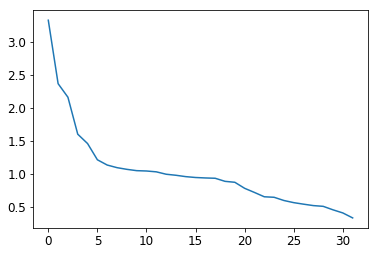

In [177]:
plt.plot(pca.explained_variance_)

In [155]:
test_pca.shape

(500, 29)

In [156]:
df_keepCol.shape

(3493, 33)

In [157]:
mlinpca4 = LinearRegression().fit(trn_pca, y_keep_col)

In [158]:
generate_output(mlinpca4,'submissinelinpca4000.csv',test_pca)

In [212]:
linpcasub1 = LinearRegression().fit(trn_pca[:,:12], y_keep_col)
generate_output(linpcasub1,'submissinelinpcasub5.csv',test_pca[:,:12])

In [191]:
n_valid = 700  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(trn_pca[:,:5], n_trn)
y_train, y_valid = split_vals(y_keep_col, n_trn)



In [199]:
mrf2 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True,min_samples_split=30)
mrf2.fit(X_train, y_train)
print_score(mrf2)

[0.18775219849948543, 0.27453007990304495, 0.3402103584234788, 0.07943941804964727, 0.08964826599232878]


In [147]:
generate_output(mrf2,'submissinmrf2.csv',test_pca)

In [193]:
mrf3 = RandomForestRegressor(n_estimators=120, bootstrap=True, n_jobs=-1)
mrf3.fit(X_train, y_train)
print_score(mrf3)

[0.058424800245407256, 0.2771229609751413, 0.8591832613797348, 0.010900250993361338]


In [149]:
generate_output(mrf3,'submissinmrf3.csv',test_pca)

In [200]:
mrf4 = RandomForestRegressor(n_estimators=1200, bootstrap=True, n_jobs=-1)
mrf4.fit(X_train, y_train)
print_score(mrf4)

[0.05554596208337475, 0.2742933190336087, 0.8665789943944852, 0.01472976801922432]


In [198]:
mrf5 = RandomForestRegressor(n_estimators=100, bootstrap=True, n_jobs=-1)
mrf5.fit(X_train, y_train)
print_score(mrf5)

[0.058105590187632186, 0.27538964880538347, 0.856959105149175, 0.010848254942071422]


In [213]:
mrfsub2 = RandomForestRegressor(n_estimators=1200, bootstrap=True, n_jobs=-1)
mrfsub2.fit(trn_pca[:,:11], y_keep_col)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [214]:
generate_output(mrfsub2,'submissionsubmrf.csv',test_pca[:,:11])

In [217]:
mrf2 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True,min_samples_split=30)
mrf2.fit(trn_pca, y_keep_col)
print_score(mrf2)

ValueError: Number of features of the model must match the input. Model n_features is 32 and input n_features is 5 

In [218]:
generate_output(mrf2,'submissionsubmrf.csv',test_pca)